# Neural Network 
### CIC Data Science Project
By: ....,Neidy Malaga,... (Alphabetical Order)



#### Step 1: Beginning Setup

Our project compares danceability_% over streams. We start by using pandas to read our data from an Excel file and display it to prove it was read well.

In [1]:
import pandas as pd

Spotify_Data = pd.read_csv('Popular_Spotify_Songs.csv')
Spotify_Data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


#### Step 2: Scatterplot Visual
Let's start by showing the scatterplot to identify the independent and dependent variable. Since we are trying to measure danceability_% over streams, streams will be the response variable (y-val) and danceability_% will be the explanatory variable (x-val).

Now, right away you can see there is a problem with the data. A small amount of values are null. In order to fix this problem, we will use an imputer, as this is its main use. We will be doing this through the help of a pipeline, which will make our code cleaner.

We will only need the numerical_columns, but we also added in one categorical column for practice. The following code block will show the scatterplot. Based on the scatterplot, we can see that it has a few outliers and that most of the data is 'clustered' to the bottom. We can imply that 1-2 clusters can cover the data, and use this information to confirm our methods in Step 3 when we actually 

Information about pipelines: https://www.kaggle.com/code/alexisbcook/pipelines
Information about imputers: https://www.kaggle.com/code/alexisbcook/missing-values

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define column names, columns you will include in pipeline
numerical_columns = ['streams', 'danceability_%']
categorical_columns = ['key']

#pipeline set for imputation strategy, the strategy is set to fill  in mean values in every missing numerical value
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

#pipeline set for imputation strategy, the strategy is set to fill in the most frequent string in every missing categorical value
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

#organizes preprocessing for next step, determines which transformers to apply for numerical/categorical 
preprocessor = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, numerical_columns),
    ('categorical', categorical_transformer, categorical_columns)
])

#sets up next steps for it to preprocessed later, creates pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#initiates algorithms for imputation on Spotify_data
Spotify_Pipeline_Data = pipeline.fit_transform(Spotify_Data)

#transforms data into a dataframe using panda
Spotify_Pipeline_Data = pd.DataFrame(Spotify_Pipeline_Data, columns=numerical_columns+categorical_columns)

#check to see if it is a dataframe
Spotify_Pipeline_Data.head()


,streams,danceability_%,key
0,141381703.0,80.0,B
1,133716286.0,71.0,C#
2,140003974.0,51.0,F
3,800840817.0,55.0,A
4,303236322.0,65.0,A


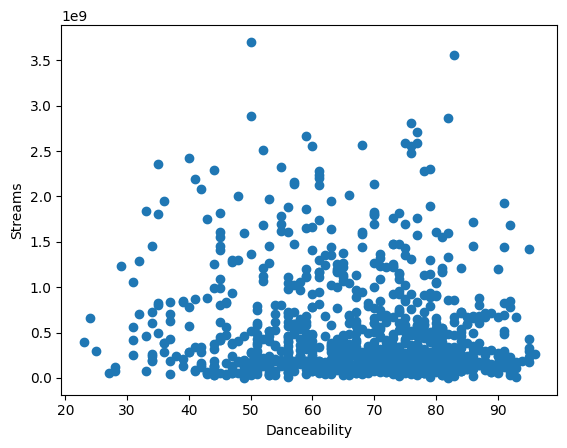

In [3]:
import matplotlib.pyplot as plt

#set up x,y vals
stream_data = Spotify_Pipeline_Data['streams']
danceability_data = Spotify_Pipeline_Data['danceability_%']

#create scatterplot, annotate scatterplot, show scatterplot
plt.scatter(danceability_data, stream_data)
plt.xlabel('Danceability')
plt.ylabel('Streams')
plt.show()


#### Step 3: Clustering Data
In order to cluster data, we will use K-Means. 